<a href="https://colab.research.google.com/github/mbamiluka/Img_Process_and_CompVision_project1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

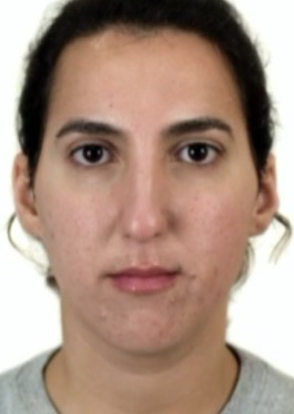

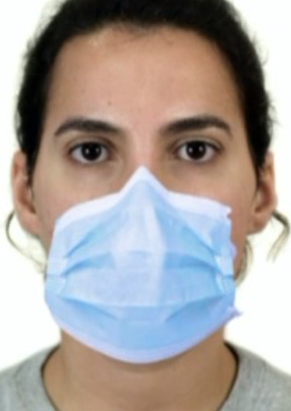

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: overflow encountered in ubyte_scalars


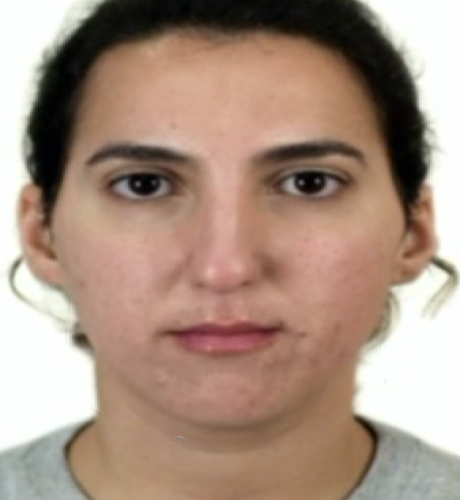

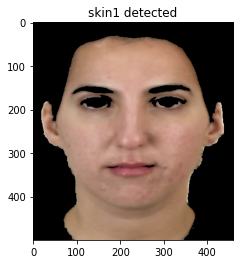

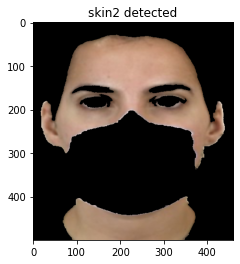

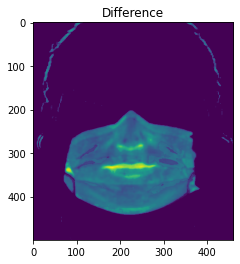

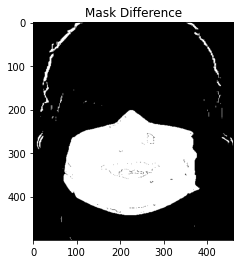

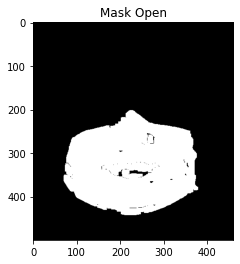

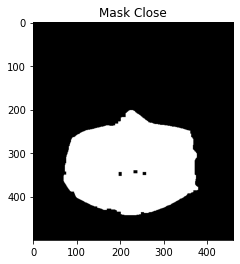

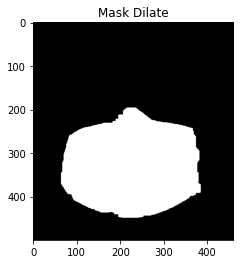

In [25]:
''' You must download pp1.png, pp2.png, and haarcascade_frontalface_default.xml 
    and upload to the 'sample_data' folder in Colab before you can run. These
    files are on the github main branch
'''
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

size = (460,500)  # dimension for resizing
#-------------------------------------------------------------------------------
# This function is used in the process of skin detection
def skin_rgb_threshold(src):
  r = src[:,:,2].astype(np.int16)
  g = src[:,:,1].astype(np.int16)
  b = src[:,:,0].astype(np.int16)

  skin_mask = (r>96) & (g>40) & (b>10) & (( src.max() - src.min()) > 15) & (np.abs(r-g) > 15) & (r>g) & (r>b)
  return src * skin_mask.reshape(skin_mask.shape[0], skin_mask.shape[1],1)
#-------------------------------------------------------------------------------
    #Read Images
im=cv.imread('sample_data/pp1.png')
im2=cv.imread('sample_data/pp2.png')

face_cascade = cv.CascadeClassifier('sample_data/haarcascade_frontalface_default.xml')
gray1 = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray1,1.1,5)
(x,y,w,h) = faces[0]
im =im[y-40:y+h+80,x:x+w,:]
cv2_imshow(im)

faces = face_cascade.detectMultiScale(gray2,1.1,5)
(x,y,w,h) = faces[0]
im2 =im2[y-40:y+h+80,x:x+w,:]
cv2_imshow(im2)


    #resize the images above
im=cv.resize(im,size,interpolation = cv.INTER_AREA)
im2=cv.resize(im2,size,interpolation = cv.INTER_AREA)
len, wid, com = im.shape

im3= cv.cvtColor(im, cv.IMREAD_COLOR)
im4 = cv.cvtColor(im2, cv.IMREAD_COLOR)

ret,thresh1 = cv.threshold(im3,40,255,cv.THRESH_BINARY) #image threshold

#skin for im3 and im4
skin = skin_rgb_threshold(im3)
skin2 = skin_rgb_threshold(im4)
plt.figure()
plt.title('skin1 detected')
plt.imshow(cv.cvtColor(skin,cv.COLOR_BGR2RGB))

plt.figure()
plt.title('skin2 detected')
plt.imshow(cv.cvtColor(skin2,cv.COLOR_BGR2RGB))

diff = np.zeros((len,wid,com), "uint8")
mask = np.zeros((len,wid), "uint8")

for i in range(len):
  for j in range(wid):
    for k in range(com):
      diff[i,j,k] = abs( int(im[i,j,k]) - int(im2[i,j,k]) )
      if diff[i,j,k] < ret:
        diff[i,j,k] = 0

plt.figure()
plt.title('Difference')
plt.imshow(cv.cvtColor(diff,cv.COLOR_BGR2GRAY))

for i in range(len):
  for j in range(wid):
    if diff[i,j,1] + diff[i,j,2] + diff[i,j,0] > 2:
      mask[i,j] = 1

plt.figure()
plt.title('Mask Difference')
plt.imshow(mask,cmap = 'gray')

kern = np.ones( (7,7), np.uint8)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kern)
plt.figure()
plt.title('Mask Open')
plt.imshow(mask,cmap = 'gray')

mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kern)
plt.figure()
plt.title('Mask Close')
plt.imshow(mask,cmap = 'gray')

#Dilate twice to get rid of edges
mask = cv.dilate(mask,kern)
mask = cv.dilate(mask,kern)
plt.figure()
plt.title('Mask Dilate')
plt.imshow(mask,cmap = 'gray')

#Merge im and im2
merge =np.zeros( (len,wid,com), 'uint8')
for i in range(len):
  for j in range(wid):
    merge[i,j,:] = im2[i,j,:]
    if mask[i,j] > 0:
      merge[i,j,:] = im[i,j,:]

#Merged Image
cv2_imshow(merge)
